<a href="https://colab.research.google.com/github/Rishikumar7137/Unstop-Talent-Park-PS1/blob/main/recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/job_descriptions.csv'
df = pd.read_csv(file_path)
# df.head()

In [ ]:
tmp = df

unused_columns = ['Job Id', 'Company Size', 'latitude', 'longitude', 'Contact', 'Job Portal', 'Benefits' , 'Company' , 	'Company Profile', 'Job Posting Date', 'Contact Person']

df.drop(columns=unused_columns, inplace=True)

In [ ]:
def categorise_experience(df):
  df['Min Experience'] = df['Experience'].apply(lambda x: 'Freshers' if x[0] == '0' else
                                        '1 Years' if x[0:2] == '1 ' else
                                        '2 years' if x[0:2] == '2 ' else
                                        '3 years' if x[0:2] == '3 ' else
                                        '4 years' if x[0:2] == '4 ' else
                                        '5 years +' if (x[0:2] >= '5 ' and x[1] == ' ') else
                                        '10 years +')
  return df
df = categorise_experience(df)


df.drop(columns=['Experience'], inplace=True)

# df.head()

In [ ]:
def categorise_salary(df):
  df['Min Salary'] = df['Salary Range'].apply(lambda x: int(x[1]+x[2]) if x[3] == 'K' else
                                              int(x[1]+x[2]+x[3])
                                              )
  return df
df = categorise_salary(df)


df.drop(columns=['Salary Range'], inplace=True)

df.head(7)

,Qualifications,location,Country,Work Type,Preference,Job Title,Role,Job Description,skills,Responsibilities,Min Experience,Min Salary
0,M.Tech,Douglas,Isle of Man,Intern,Female,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",5 years +,59
1,BCA,Ashgabat,Turkmenistan,Intern,Female,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",2 years,56
2,PhD,Macao,"Macao SAR, China",Temporary,Male,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,Freshers,61
3,PhD,Porto-Novo,Benin,Full-Time,Female,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",4 years,65
4,MBA,Santiago,Chile,Intern,Female,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,1 Years,64
5,MCA,Brussels,Belgium,Full-Time,Male,Software Tester,Quality Assurance Analyst,A Quality Assurance Analyst tests software and...,Quality assurance processes Testing methodolog...,Test software applications and systems to iden...,4 years,59
6,PhD,George Town,Cayman Islands,Temporary,Both,Teacher,Classroom Teacher,A Classroom Teacher educates students in a spe...,Teaching pedagogy Classroom management Curricu...,"Plan and deliver engaging lessons, adapting te...",3 years,63


In [ ]:
seven_most_needed_job_titles = df['Job Title'].value_counts().head(7)
seven_most_needed_job_titles

Job Title
UX/UI Designer                  48551
Digital Marketing Specialist    27975
Software Engineer               27630
Network Engineer                24393
Software Tester                 20945
Executive Assistant             20776
Procurement Manager             20734
Name: count, dtype: int64

In [ ]:
#job filtering
total_rows = df.shape[0]
print(seven_most_needed_job_titles*100/total_rows)

seven_job_title_only = df[df['Job Title'].isin([i for i in seven_most_needed_job_titles.index])]

Job Title
UX/UI Designer                  3.004505
Digital Marketing Specialist    1.731191
Software Engineer               1.709841
Network Engineer                1.509524
Software Tester                 1.296150
Executive Assistant             1.285691
Procurement Manager             1.283092
Name: count, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Set2')
sns.set_style('dark')

def my_catplot(variable:str, hue_order=None, title=None):
    sns.catplot(data=seven_job_title_only,
                x='Job Title',
                kind='count',
                height = 5,
                width = 1,
                gap = 0.2,
                hue=variable,
                hue_order=hue_order)

    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.xlabel('Job Title')
    plt.title(title)

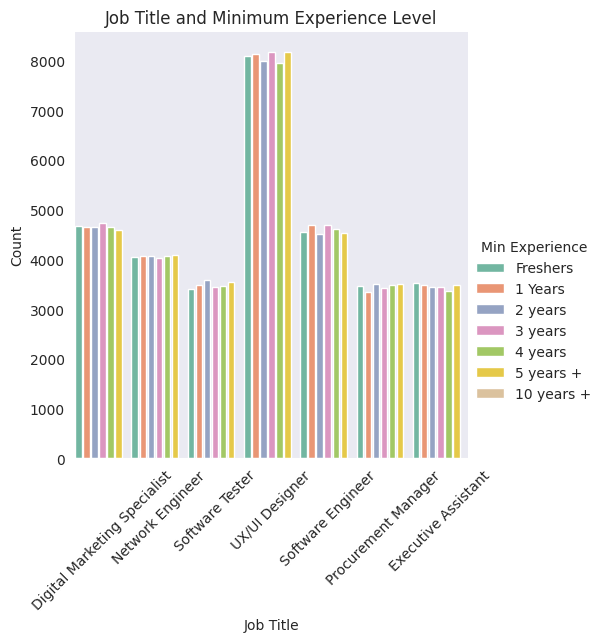

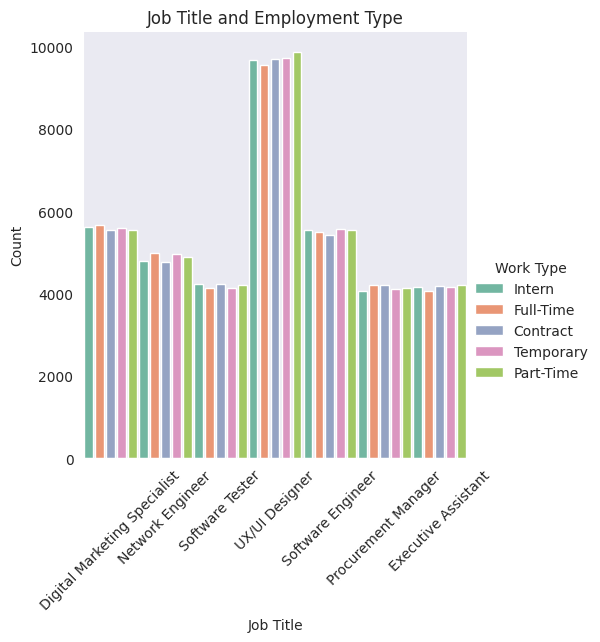

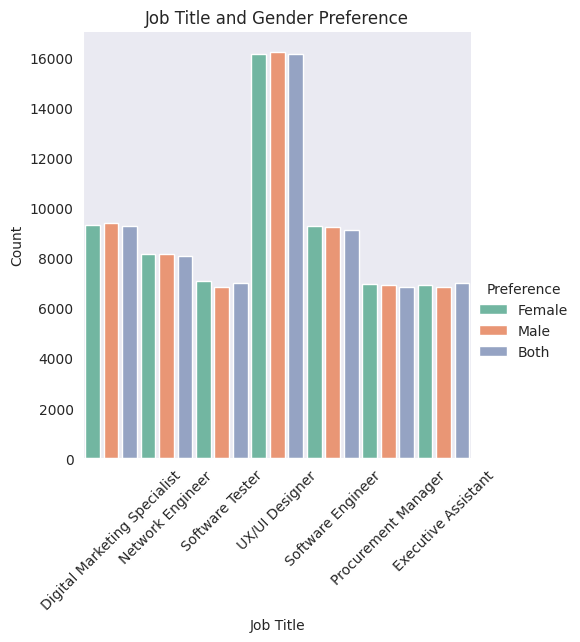

In [ ]:
exp_order=['Freshers','1 Years','2 years', '3 years', '4 years', '5 years +', '10 years +']

my_catplot(variable='Min Experience', hue_order=exp_order , title='Job Title and Minimum Experience Level')

my_catplot(variable='Work Type', title='Job Title and Employment Type')

my_catplot(variable='Preference', title='Job Title and Gender Preference')

In [ ]:
seven_country = df['Country'].value_counts().head(8)

seven_country_only = df[df['Country'].isin([i for i in seven_country.index])]

country_high_paid = seven_country_only[['Country', 'Min Salary']].groupby(by='Country').mean().sort_values(by='Min Salary', ascending=False)

country_high_paid

,Min Salary
Country,
Sierra Leone,60.039446
Azerbaijan,60.033887
Malta,60.012042
Sri Lanka,59.999346
San Marino,59.998429
Somalia,59.992587
"Venezuela, RB",59.947622
Vietnam,59.931364


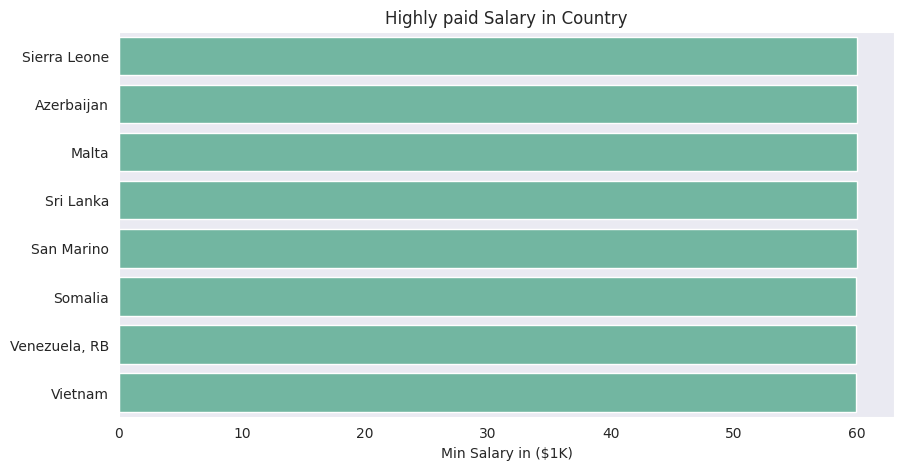

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(data=country_high_paid, y=country_high_paid.index, x='Min Salary')

plt.ylabel('')
plt.xlabel('Min Salary in ($1K)')
plt.title('Highly paid Salary in Country');

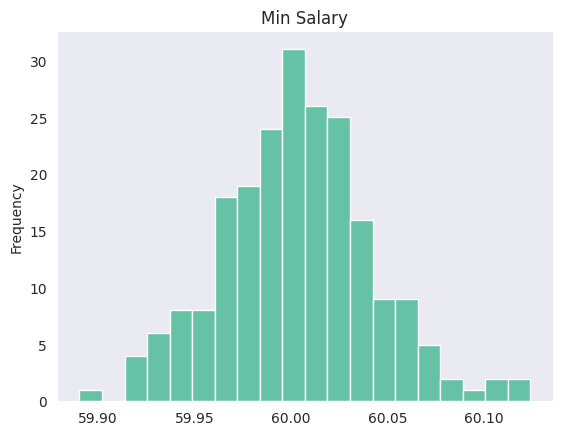

In [ ]:
from matplotlib import pyplot as plt
country_high_paid['Min Salary'].plot(kind='hist', bins=20, title='Min Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sns.catplot(data=df,
            x='Min Experinece',
            y ='Min Salary',
            order=exp_order,
            height= 10,
            kind='box',
            hue='company_size')

plt.title('Experience Level, Salary, and Company Size')
plt.ylabel('Min Salary')
plt.xlabel('');

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define function to encode text with BERT and get embeddings
def get_bert_embeddings(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128, padding='max_length', return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs[0][:, 0, :].numpy()  # Extract the embeddings from the [CLS] token
    return embeddings

# Load hiring database (example: job descriptions)
# data = pd.read_csv('Job Decription')  # Assuming your hiring database is stored in a CSV file

data = df

# Preprocess and encode job descriptions with BERT
job_embeddings = data['Job Description'].apply(get_bert_embeddings).values

# Define a candidate profile (example)
candidate_profile = "Experienced software engineer with a background in machine learning and data science."

# Preprocess and encode candidate profile with BERT
candidate_embedding = get_bert_embeddings(candidate_profile)

# Calculate cosine similarity between candidate profile and job descriptions
similarities = cosine_similarity(candidate_embedding.reshape(1, -1), job_embeddings)

# Get indices of top N most similar job descriptions
N = 5  # Number of recommendations
top_indices = similarities.argsort(axis=1)[0][-N:][::-1]

# Print recommended job descriptions
print("Top {} recommended job descriptions:".format(N))
for idx in top_indices:
    print("- Job Title: {}".format(data.iloc[idx]['job_title']))
    print("  Description: {}".format(data.iloc[idx]['job_description']))
    print("  Similarity Score: {:.2f}".format(similarities[0][idx]))
    print()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


KeyboardInterrupt: 

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Define user context (example: user's past interactions or preferences)
user_context = "I enjoy reading science fiction novels and watching space documentaries."

# Tokenize user context
input_ids = tokenizer.encode(user_context, return_tensors="pt")

# Generate recommendations
output = model.generate(input_ids,
                         max_length=100,
                         num_return_sequences=2,
                         temperature=1.0,
                         top_k=50,
                         pad_token_id=tokenizer.eos_token_id,  # Set pad token ID to end-of-sequence token ID
                         attention_mask=torch.ones(input_ids.shape))  # Set attention mask to indicate all tokens are attended to

# Decode generated recommendations
recommendations = [tokenizer.decode(sequence, skip_special_tokens=True) for sequence in output]

# Print recommendations
print("Top Recommendations:")
for i, recommendation in enumerate(recommendations, start=1):
    print(f"{i}. {recommendation}")



tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

ValueError: Greedy methods without beam search do not support `num_return_sequences` different than 1 (got 2).

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config
import torch

# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
config = GPT2Config.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2", config=config)

# Define user context (example: user's past interactions or preferences)
user_context = "I enjoy working with team and also tech enthusiast proficient in MERN stack"

# Tokenize user context
input_ids = tokenizer.encode(user_context, return_tensors="pt")

# Generate recommendations using beam search
output = model.generate(input_ids,
                         max_length=100,
                         num_return_sequences=1,
                         temperature=1.0,
                         top_k=50,
                         num_beams=2,  # Enable beam search with 5 beams
                         pad_token_id=tokenizer.eos_token_id,
                         early_stopping=True)

# Decode generated recommendations
recommendations = [tokenizer.decode(sequence, skip_special_tokens=True) for sequence in output]

# Print recommendations
print("Top Recommendations:")
for i, recommendation in enumerate(recommendations, start=1):
    print(f"{i}. {recommendation}")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Top Recommendations:
1. I enjoy working with team and also tech enthusiast proficient in MERN stack.

I am also a member of the MERN team.

I am a member of the MERN team.

I am a member of the MERN team.

I am a member of the MERN team.

I am a member of the MERN team.

I am a member of the MERN team.

I am a member of the MERN team.


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

def generate_text_with_gpt2(prompt, model_name="gpt2-medium", max_length=100, num_return_sequences=1):
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device)

    output = model.generate(input_ids=input_ids,
                            max_length=max_length,
                            attention_mask = attention_mask,
                            num_return_sequences=num_return_sequences,
                            # temperature=0.7,
                            top_k=50,
                            top_p=0.95,
                            repetition_penalty=1.2)

    generated_texts = [tokenizer.decode(seq, skip_special_tokens=True) for seq in output]
    return generated_texts

prompt = "Generate single word for - \n"
text = "I am a React Developer"
generated_texts = generate_text_with_gpt2(prompt + text)

print("Prompt:")
print(prompt)
print("\nGenerated Texts:")
for i, text in enumerate(generated_texts, 1):
    print(f"{i}. {text}")


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:
Generate single word for - 


Generated Texts:
1. Generate single word for - 
I am a React Developer. I love to write code and learn new things every day. But sometimes, it's hard when you have so many projects that need your help! So here is my list of the best tools in this field:


In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2")

# Load dataset containing job descriptions and candidate profiles
candidate_profile = my_resume
dataset = df

# Tokenize all candidate profiles and job descriptions together
texts = list(dataset["Job Description"]) + [candidate_profile]
encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Generate embeddings for all texts
with torch.no_grad():
    outputs = model(**encoded_input)
embeddings = outputs.last_hidden_state

# Calculate similarity between candidate profile and job descriptions
candidate_embedding = embeddings[-1].unsqueeze(0)  # Candidate profile embedding
job_embeddings = embeddings[:-1]  # Job description embeddings
similarity_scores = cosine_similarity(candidate_embedding, job_embeddings)[0]

# Add similarity scores to the dataset
dataset["similarity_score"] = similarity_scores

# Sort jobs by similarity score in descending order
sorted_dataset = dataset.sort_values(by="similarity_score", ascending=False)

# Print top job recommendations
top_recommendations = sorted_dataset.head(10)
print(top_recommendations)


ValueError: Asking to pad but the tokenizer does not have a padding token. Please select a token to use as `pad_token` `(tokenizer.pad_token = tokenizer.eos_token e.g.)` or add a new pad token via `tokenizer.add_special_tokens({'pad_token': '[PAD]'})`.

First few rows of the dataset:
  Qualifications    location           Country  Work Type Preference  \
0         M.Tech     Douglas       Isle of Man     Intern     Female   
1            BCA    Ashgabat      Turkmenistan     Intern     Female   
2            PhD       Macao  Macao SAR, China  Temporary       Male   
3            PhD  Porto-Novo             Benin  Full-Time     Female   
4            MBA    Santiago             Chile     Intern     Female   

                      Job Title                       Role  \
0  Digital Marketing Specialist       Social Media Manager   
1                 Web Developer     Frontend Web Developer   
2            Operations Manager    Quality Control Manager   
3              Network Engineer  Wireless Network Engineer   
4                 Event Manager         Conference Manager   

                                     Job Description  \
0  Social Media Managers oversee an organizations...   
1  Frontend Web Developers design and implement u..

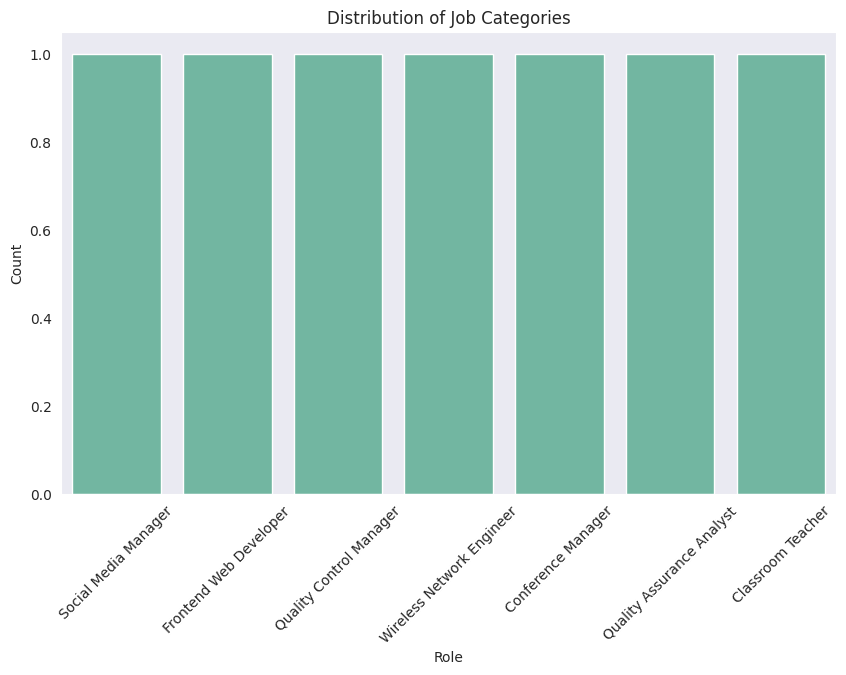

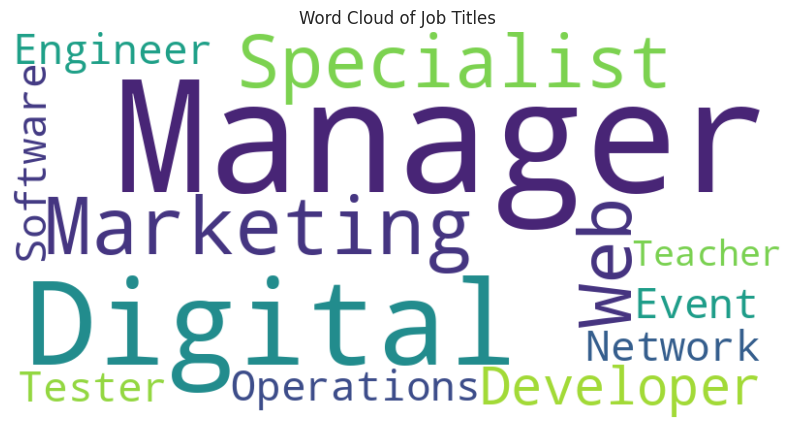

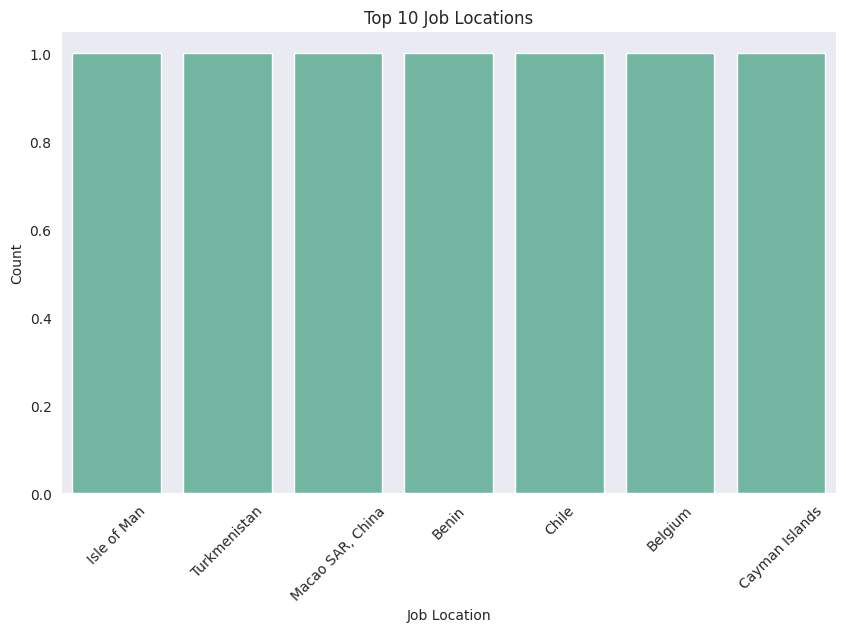

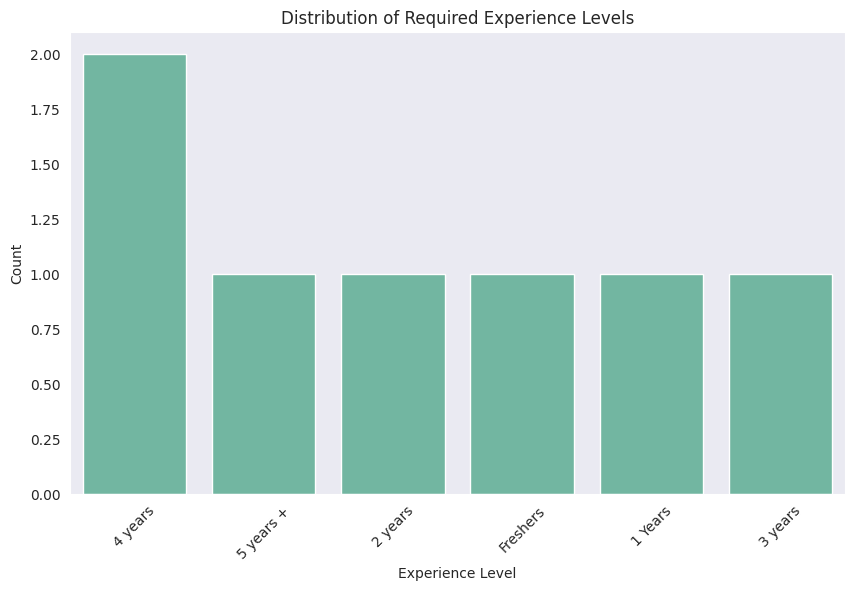

In [ ]:
#The

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = df.head(40)
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Data types and missing values
print("\nData types and missing values:")
print(df.info())

# Distribution of job categories
plt.figure(figsize=(10, 6))
sns.countplot(x="Role", data=df)
plt.title("Distribution of Job Categories")
plt.xlabel("Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Word cloud of job titles
from wordcloud import WordCloud

job_titles_text = " ".join(df["Job Title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(job_titles_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of Job Titles")
plt.axis("off")
plt.show()

# Distribution of job locations
plt.figure(figsize=(10, 6))
sns.countplot(x="Country", data=df, order=df["Country"].value_counts().index[:10])
plt.title("Top 10 Job Locations")
plt.xlabel("Job Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Distribution of required experience levels
plt.figure(figsize=(10, 6))
sns.countplot(x="Min Experience", data=df, order=df["Min Experience"].value_counts().index)
plt.title("Distribution of Required Experience Levels")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1", trainable=True)